This cell below tells Jupyter to render plots on the page (not pop-up).

In [1]:
%matplotlib inline

Import all necessary libraries.

In [11]:
#standard library imports
import urllib
import json
from datetime import datetime
import os.path

#third party imports
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

Define a bunch of constants that we'll use later.

In [3]:
TIMEFMT = '%Y-%m-%dT%H:%M:%S'
QUERY_TEMPLATE = 'http://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=START&endtime=END&producttype=losspager'
GREEN = '#00B04F'
YELLOW = '#FFFF00'
ORANGE = '#FF9900'
RED = '#FF0000'

Modify these start/end times as desired.

In [4]:
start_time = datetime(2010,9,1).strftime(TIMEFMT)
end_time = datetime.utcnow().strftime(TIMEFMT)

In [5]:
#modify the QUERY_TEMPLATE variable to use the string representing desired start time
query = QUERY_TEMPLATE.replace('START',start_time)
#make sure you modify the new query variable the second time with end time
query = query.replace('END',end_time)

What does this query string look like?  You can cut and paste this into your browser to see what the GeoJSON output looks like.

In [6]:
query

'http://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2010-09-01T00:00:00&endtime=2016-11-15T21:13:22&producttype=losspager'

Open the URL, read the data from it (converting from bytes to ASCII), and then parse that string into a dictionary using the json module.

In [7]:
fh = urllib.request.urlopen(query)
data = fh.read().decode('utf-8')
fh.close()
jdict = json.loads(data)

Loop over the features (events) in the dictionary, and grab the epicenter and alert level for each one, store those ultimately in numpy arrays.

In [8]:
alert_dict = {'green':GREEN,
             'yellow':YELLOW,
             'orange':ORANGE,
             'red':RED}
lats = []
lons = []
colors = []
for event in jdict['features']:
    lon,lat,depth = event['geometry']['coordinates']
    alert = event['properties']['alert']
    color = alert_dict[alert]
    lats.append(lat)
    lons.append(lon)
    colors.append(color)
#make numpy arrays out of these lists
lats = np.array(lats)
lons = np.array(lons)
colors = np.array(colors)

Make a Robinson plot of the globe, using the default background image from Cartopy.  Then draw the events with their alert color, greens on the bottom, reds on the top.

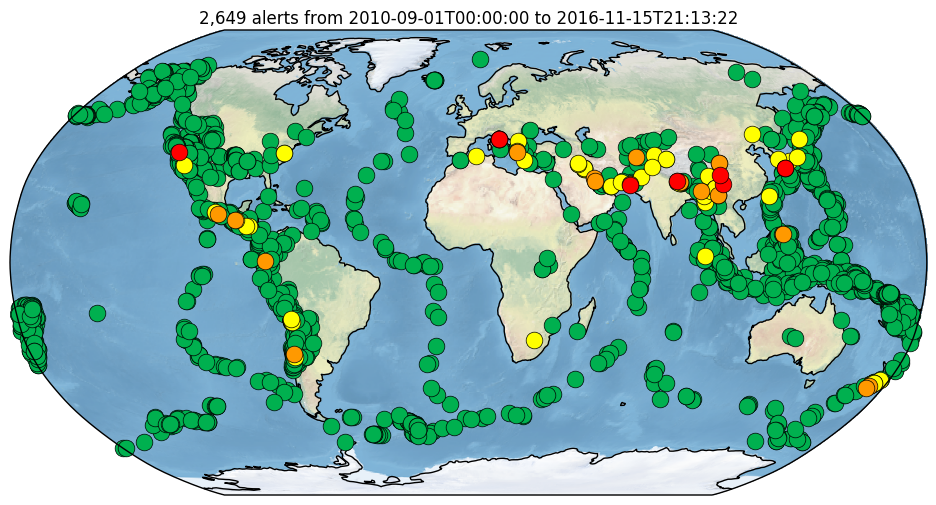

In [12]:
fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.Robinson())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()

ms = 12

plt.plot(lons[colors==GREEN],lats[colors==GREEN],
         marker='o',color=GREEN,markeredgecolor='black',
         linewidth=0,
         markersize=ms,transform=ccrs.PlateCarree())

plt.plot(lons[colors==YELLOW],lats[colors==YELLOW],
         marker='o',color=YELLOW,markeredgecolor='black',
         linewidth=0,
         markersize=ms,transform=ccrs.PlateCarree())

plt.plot(lons[colors==ORANGE],lats[colors==ORANGE],
         marker='o',color=ORANGE,markeredgecolor='black',
         linewidth=0,
         markersize=ms,transform=ccrs.PlateCarree())

plt.plot(lons[colors==RED],lats[colors==RED],
         marker='o',color=RED,markeredgecolor='black',
         linewidth=0,
         markersize=ms,transform=ccrs.PlateCarree())

tstr = "{:,} alerts from {} to {}".format(len(lons),start_time,end_time)
plt.title(tstr)
#save the results as a PDF file in the current directory
homedir = os.path.expanduser('~')
outfile = os.path.join(homedir,'global_pager_alerts.pdf')
plt.savefig(outfile)